# Analyse de la composition du Réseau Français de la recherche reproductible

(c) 2025, Gloria González Curto
https://gloriagcurto.info

    This program is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program.  If not, see <https://www.gnu.org/licenses/>.

### Library import

In [361]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
# color palette for heatmaps
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
# save tables as images
from pandas.plotting import table
# save plots in true size
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})


### Set style and color pallete

In [362]:
# Minimalist design
sns.set_style("whitegrid")

# RFRR palette definition. 
RFRR_palette = ["#35346b", "#a2dfd9", "#6943a4", "#b89ad3"]
color_codes_RFRR = ['dark_blue', 'light_blue', 'dark_purple', 'light_purple']

c = lambda x: RFRR_palette[color_codes_RFRR.index(x)]
#use example
#import numpy as np
#x=np.random.randn(100)
#g = sns.histplot(x, color=c("dark_purple"))

#plt.show()

#Sequential palette

# Define the colors
# The color #e9e0f1" is a lighter version of light purple "#b89ad3"
colors = ["#e9e0f1", "#6943a4"]

# Create a custom colormap
RFRR_seq_palette = LinearSegmentedColormap.from_list("custom_sequential", colors, N=256)


### Definition of custom functions

- Generate count and percentage dataframes

In [363]:
def count_percent(data, var, FoldPath, FileName):

#Subset a variable and compute counts and percentage and sort by counts
#data = data_members
#var = "Ville", "Région", "Statut_abrev", "Discipline"
#FoldPath='Results/'
#FileName="counts_percent_"

    df=pd.DataFrame({'Count' :data.groupby(var).size()}).reset_index()
    df= df.assign(Percentage = lambda x: (x['Count'] /df['Count'].sum() * 100)).sort_values(by=['Count'], ascending=False)
    #Save
    filepath= os.path.join(FoldPath, FileName+var+".csv")
    df.to_csv(filepath, sep=';', encoding='latin3', index=False, header=True)
    print(df.head())
    return (df)



- Barplots

def bargraphs_FR (df,var_quant, var, colour, metric, var_FR, FoldPath, FileName):
#Barplot en français
#df = df_p (sortie de count_percent)
#var_quant= "Count" or "Percentage"
#var = "Ville", "Région", "Statut_abrev", "Discipline"
#color= "dark_purple"
#metric= "Nombre", "Pourcentage"
#var_FR= "Ville", "Région", "Statut_abrev", "Discipline"
#FoldPath='Results/Plots/'
#FileName="counts_" or "percentage"
    bar=sns.barplot(data=df_p, x=var_quant, y=var, color=c(colour), legend=False)
    plt.xlabel(metric+" de membres par "+var_FR)
    plt.ylabel(var_FR)
    plt.title("Distribution des membres par "+var_FR)
    #Save
    filepath= os.path.join(FoldPath, FileName+var+"_FR.png")
    bar.figure.savefig(filepath)
    plt.show()
    return(bar)

In [364]:
def bargraphs_FR(df, var_quant, var, colour, metric, var_FR, FoldPath, FileName):
    """
    df         : DataFrame issu de count_percent
    var_quant  : "Count" ou "Percentage"
    var        : nom de la variable catégorielle à mettre en Y
    colour     : clé de couleur pour c(colour)
    metric     : "Nombre" ou "Pourcentage" (pour l'axe X)
    var_FR     : label en français de var (pour titres/axes)
    FoldPath   : dossier de sauvegarde, ex 'Results/Plots/'
    FileName   : préfixe de fichier, ex 'counts_' ou 'percentage'
    """

    # 1. Déterminer l'ordre alphabétique des catégories de var
    ordered_categories = sorted(df[var].dropna().unique())

    # 2. Créer le barplot en forçant cet ordre
    bar = sns.barplot(
        data=df,
        x=var_quant,
        y=var,
        order=ordered_categories,
        color=c(colour),
        legend=False
    )

    # 3. Légendes et titres
    plt.xlabel(f"{metric} de membres par {var_FR}")
    plt.ylabel(var_FR)
    plt.title(f"Distribution des membres par {var_FR}")

    # 4. Sauvegarde
    filepath = os.path.join(FoldPath, f"{FileName}{var}_FR.png")
    bar.figure.savefig(filepath, bbox_inches='tight', dpi=300)

    plt.show()
    return bar

In [365]:
#Anglais
def bargraphs_EN(df, var_quant, var, colour, metric, var_EN, FoldPath, FileName):
    """
    English barplot function with Y axis sorted alphabetically.
    
    Parameters:
    - df         : DataFrame issu de count_percent
    - var_quant  : "Count" or "Percentage"
    - var        : name of the categorical variable (e.g., "City", "Region", "Discipline", "type_of_position")
    - colour     : color key for c(colour)
    - metric     : "Number" or "Percentage"
    - var_EN     : English label for var (for axis and title)
    - FoldPath   : output folder path, e.g. 'Results/Plots/'
    - FileName   : prefix for filename, e.g. 'counts_' or 'percentage'
    """
    # 1. Déterminer l’ordre alphabétique des catégories de var
    ordered_categories = sorted(df[var].dropna().unique())

    # 2. Tracer le barplot en forçant cet ordre
    bar = sns.barplot(
        data=df,
        x=var_quant,
        y=var,
        order=ordered_categories,
        color=c(colour),
        legend=False
    )

    # 3. Titres et labels
    plt.xlabel(f"{metric} of members by {var_EN}")
    plt.ylabel(var_EN)
    plt.title(f"Distribution of members by {var_EN}")

    # 4. Sauvegarde
    filepath = os.path.join(FoldPath, f"{FileName}{var}_EN.png")
    bar.figure.savefig(filepath, bbox_inches='tight', dpi=300)

    # 5. Affichage
    plt.show()

    return bar


- Save tables as images

In [366]:
def table_to_image (data, var, FoldPath, FileName) :

    ax = plt.subplot(111, frame_on=False) # no visible frame
    ax.xaxis.set_visible(False)  # hide the x axis
    ax.yaxis.set_visible(False)  # hide the y axis
    table=pd.plotting.table(ax, data, loc='center',
                          cellLoc='center', colWidths=list([.2, .2]))
    filepath= os.path.join(FoldPath, FileName+var+".png")
  
    plt.savefig(filepath)
    plt.show()
    return(table)


## Data import and summaries
### Read data

In [367]:

data_members = pd.read_csv('Data/membres_anonyme.csv', sep="\t", header=0, encoding = "latin3")
print(data_members.shape)
data_members.columns

(116, 20)


Index(['Genre', 'Laboratoire', 'Institut', 'Institut.1', 'Ville',
       'Département', 'Région', 'Statut', 'Statut_abrev', 'Fonction', 'Thèse',
       'PhD', 'Discipline_EN', 'Discipline', 'Discipline principale',
       'Discipline secondaire 1', 'Discipline secondaire 2',
       'Discipline secondaire 3', 'Discipline secondaire 4',
       'Discipline secondaire 5'],
      dtype='object')

In [368]:
data_members.head()


Genre                                   Laboratoire  \
0     F            AuBi Mésocentre Clermont-Auvergne    
1     F  Centre de Recherche en Cancérologie de Lyon    
2     M                              LBMC (UMR 5239)    
3     M                               LIMOS UMR 6158    
4     F                                           LJK   

                        Institut  \
0  Université Clermont Auvergne    
1            Centre Léon Berard    
2                          CNRS    
3     UCA Clermont Auvergne INP    
4     Université Grenoble Alpes    

                                     Institut.1     Ville  Département  \
0                 Université Clermont Auvergne    Aubière  Puy-de-Dôme   
1  Centre de Recherche en Cancérologie de Lyon       Lyon        Rhône   
2                                         CNRS       Lyon        Rhône   
3                  Université Clermont Auvergne   Aubière  Puy-de-Dôme   
4                    Université Grenoble Alpes   Grenoble        Isère   

                 Région                   Statut Statut_abrev  \
0  Auvergne-Rhône-Alpes  Ingénieur de Recherche            IR   
1  Auvergne-Rhône-Alpes  Ingénieur de Recherche            IR   
2  Auvergne-Rhône-Alpes  Ingénieur de Recherche            IR   
3  Auvergne-Rhône-Alpes               Doctorant     Doctorand   
4  Auvergne-Rhône-Alpes   Ingénieur de Recherche           IR   

               Fonction Thèse  PhD          Discipline_EN  \
0                   ITA   Oui  Yes         Bioinformatics   
1                   ITA   Oui  Yes         Bioinformatics   
2                   ITA   Oui  Yes          Biostatistics   
3  Enseignant-Chercheur   Non   No  Computational science   
4                   ITA   Oui  Yes  Computational science   

             Discipline     Discipline principale  Discipline secondaire 1  \
0       Bioinformatique                  Biologie  Physiologie moéculaire    
1       Bioinformatique           Bioinformatique     Génomique du cancer    
2        Biostatistique         Machine Learning    Développement logiciel   
3  Calcul  scientifique              Informatique         Reproductibilité   
4  Calcul  scientifique  Mathématiques appliquées                      NaN   

    Discipline secondaire 2 Discipline secondaire 3 Discipline secondaire 4  \
0                   Calcul                      NaN                     NaN   
1                       NaN                     NaN                     NaN   
2                       NaN                     NaN                     NaN   
3  Calcul haute performance                     NaN                     NaN   
4                       NaN                     NaN                     NaN   

  Discipline secondaire 5  
0                     NaN  
1                     NaN  
2                     NaN  
3                     NaN  
4                     NaN

### Statistical summary of the data:

All variables are categorical

In [369]:
data_members.describe()

Genre Laboratoire Institut Institut.1  Ville Département  \
count    116         116      116        116    116         116   
unique     2         105       63         55     36          32   
top        M   UMR TSE-R     CNRS       CNRS  Paris       Paris   
freq      74           3       19         23     21          21   

               Région                   Statut Statut_abrev Fonction Thèse  \
count             116                      115          116      116   116   
unique             16                       23           15        3     2   
top     Île-de-France  Ingénieur de Recherche            IR      ITA   Oui   
freq               35                       33           45       67    92   

        PhD          Discipline_EN    Discipline Discipline principale  \
count   116                    116           116                   110   
unique    2                     22            21                    54   
top     Yes  Computational science  Informatique          Informatique   
freq     92                     30            26                    19   

       Discipline secondaire 1           Discipline secondaire 2  \
count                       80                                32   
unique                      71                                30   
top            Science ouverte  Gestion des données de recherche   
freq                         3                                 2   

                                  Discipline secondaire 3  \
count                                                  10   
unique                                                 10   
top     Histoire et civilisations : histoire et archéo...   
freq                                                    1   

       Discipline secondaire 4  \
count                        8   
unique                       3   
top                Engineering   
freq                         5   

                                  Discipline secondaire 5  
count                                                   1  
unique                                                  1  
top     Systèmes de publication pour l'édition critiqu...  
freq                                                    1

#### Summary tables pour les villes, les status et la discipline

Index(['Genre', 'Laboratoire', 'Institut', 'Institut.1', 'Ville',
       'Département', 'Région', 'Statut', 'Statut_abrev', 'Fonction', 'Thèse',
       'PhD', 'Discipline_EN', 'Discipline', 'Discipline principale',
       'Discipline secondaire 1', 'Discipline secondaire 2',
       'Discipline secondaire 3', 'Discipline secondaire 4',
       'Discipline secondaire 5'],
      dtype='object')


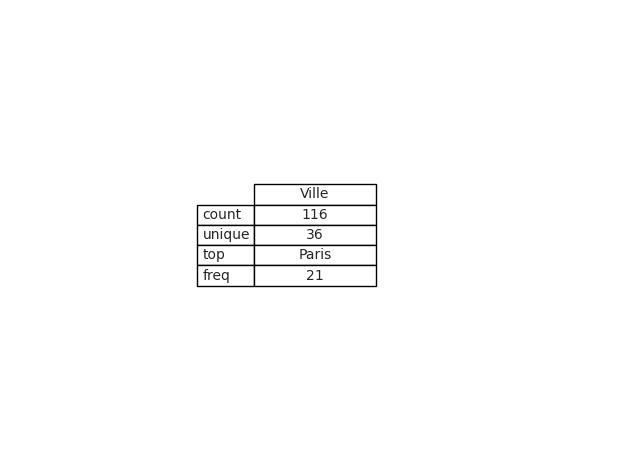

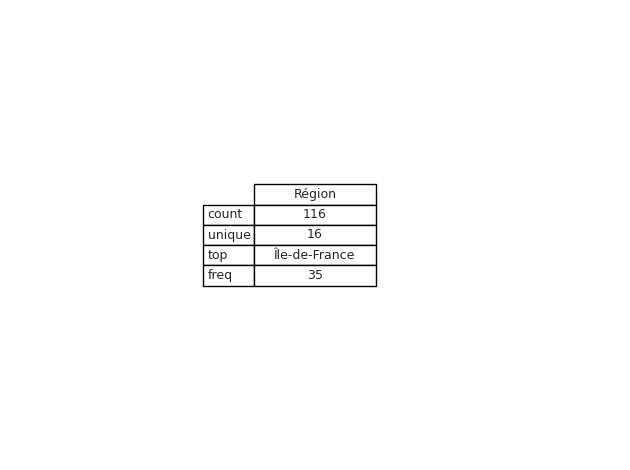

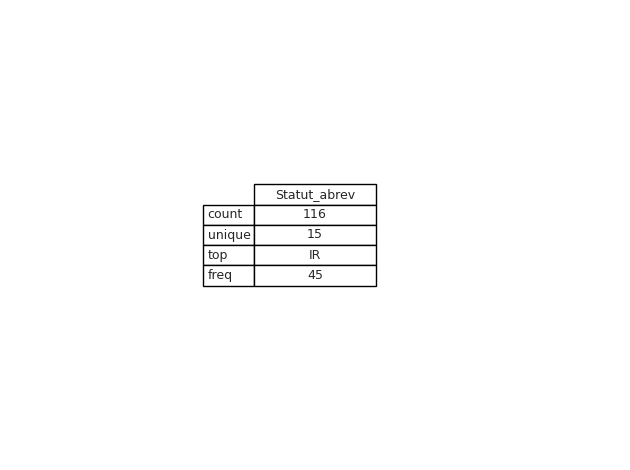

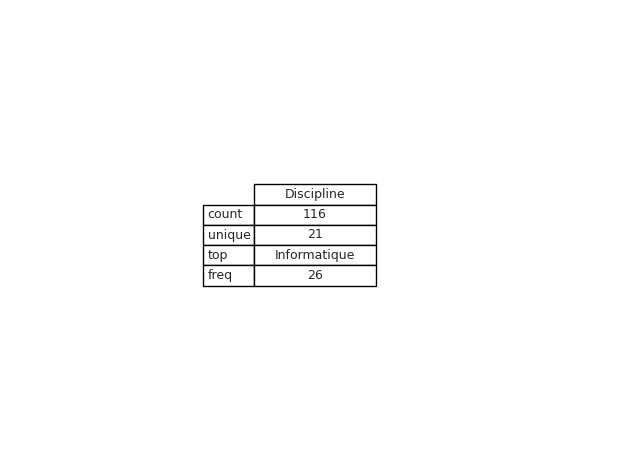

In [370]:
#Check variable names
print(data_members.columns)

# Save Ville summary
ville = data_members['Ville'].describe()

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
table=pd.plotting.table(ax, ville, loc='center',
                          cellLoc='center', colWidths=list([.2, .2]))

plt.savefig('Results/Tables/table_summary_ville_FR.png')
plt.show()

# Save Région summary
region = data_members['Région'].describe()

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
table=pd.plotting.table(ax, region, loc='center',
                          cellLoc='center', colWidths=list([.2, .2]))
plt.savefig('Results/Tables/table_summary_region_FR.png')
plt.show()

# Save Statut summary
statut = data_members['Statut_abrev'].describe()

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
table=pd.plotting.table(ax, statut, loc='center',
                          cellLoc='center', colWidths=list([.2, .2]))
plt.savefig('Results/Tables/table_summary_statut_FR.png')
plt.show()

# Save Discipline summary
discipline = data_members['Discipline'].describe()

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
table=pd.plotting.table(ax, discipline, loc='center',
                          cellLoc='center', colWidths=list([.2, .2]))

plt.savefig('Results/Tables/table_summary_discipline_FR.png')
plt.show()

### Membres par région et par discipline

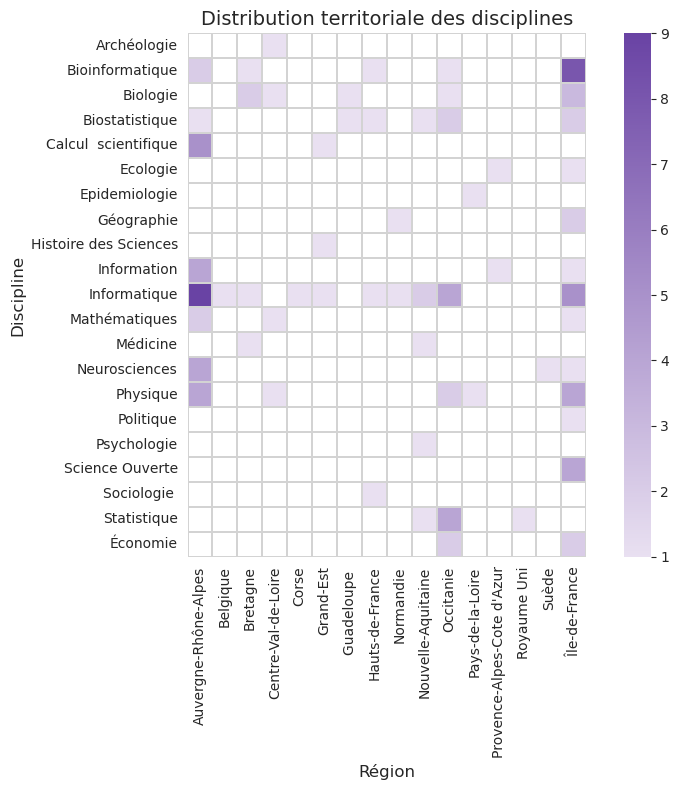

In [371]:
df=pd.DataFrame({'Count' :data_members.groupby(["Région", "Discipline"]).size()}).reset_index()

df.head()

df_heat = df.pivot(index="Discipline", columns="Région", values="Count")
df_heat = df_heat.sort_index(axis=0).sort_index(axis=1)

plt.figure(figsize=(8, 8)) 
plt.title('Distribution territoriale des disciplines', fontsize = 14) # title with fontsize 14
plt.xlabel('Régions', fontsize = 12) # x-axis label with fontsize 12
plt.ylabel('Disciplines', fontsize = 12) # y-axis label with fontsize 12
#plt.yticks(rotation=15)
sns.heatmap(df_heat, cmap=RFRR_seq_palette, linewidths=0.05, linecolor="lightgrey", square=True).get_figure().savefig(('Results/Plots//heatmap_region_discipline_FR.png'))

df.to_csv('Results/members_region_discipline.csv', sep=';', encoding='latin3', index=False, header=True)


### Members by discipline and region. English plot

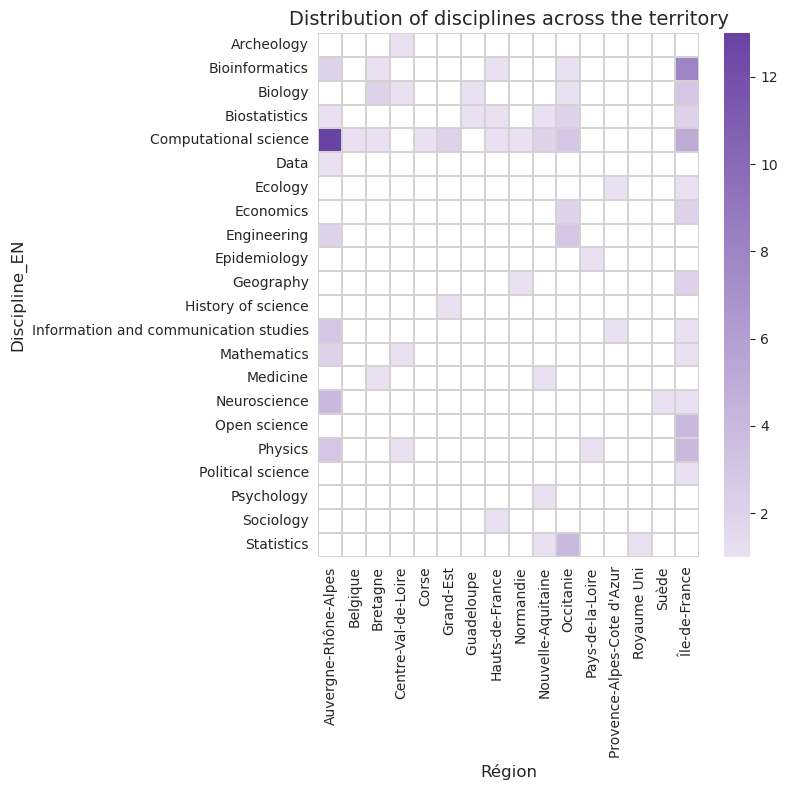

In [372]:
df=pd.DataFrame({'Count' :data_members.groupby(["Région", "Discipline_EN"]).size()}).reset_index()

df.head()

df_heat = df.pivot(index="Discipline_EN", columns="Région", values="Count")
df_heat = df_heat.sort_index(axis=0).sort_index(axis=1)

plt.figure(figsize=(8, 8)) 
plt.title('Distribution of disciplines across the territory', fontsize = 14) # title with fontsize 14
plt.xlabel('Regions', fontsize = 12) # x-axis label with fontsize 12
plt.ylabel('Disciplines', fontsize = 12) # y-axis label with fontsize 12
#plt.yticks(rotation=15)
sns.heatmap(df_heat, cmap=RFRR_seq_palette, linewidths=0.05, linecolor="lightgrey", square=True).get_figure().savefig(('Results/Plots//heatmap_region_discipline_EN.png'))

df.to_csv('Results/members_region_discipline_EN.csv', sep=';', encoding='latin3', index=False, header=True)


### Membres par genre et par discipline

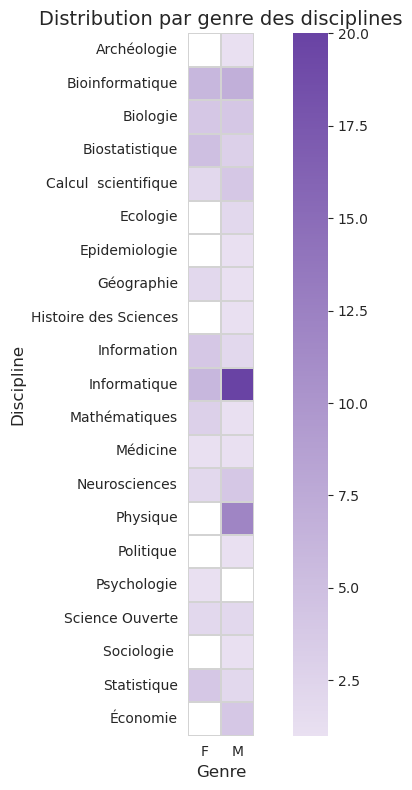

In [373]:
df=pd.DataFrame({'Count' :data_members.groupby(["Genre", "Discipline"]).size()}).reset_index()

df.head()

df_heat = df.pivot(index="Discipline", columns="Genre", values="Count")
df_heat = df_heat.sort_index(axis=0).sort_index(axis=1)

plt.figure(figsize=(8, 8)) 
plt.title('Distribution par genre des disciplines', fontsize = 14) # title with fontsize 14
plt.xlabel('Genre', fontsize = 12) # x-axis label with fontsize 12
plt.ylabel('Disciplines', fontsize = 12) # y-axis label with fontsize 12
#plt.yticks(rotation=15)
sns.heatmap(df_heat, cmap=RFRR_seq_palette, linewidths=0.05, linecolor="lightgrey", square=True).get_figure().savefig(('Results/Plots//heatmap_genre_discipline_FR.png'))

df.to_csv('Results/members_genre_discipline.csv', sep=';', encoding='latin3', index=False, header=True)


### Membres par fonction et par discipline

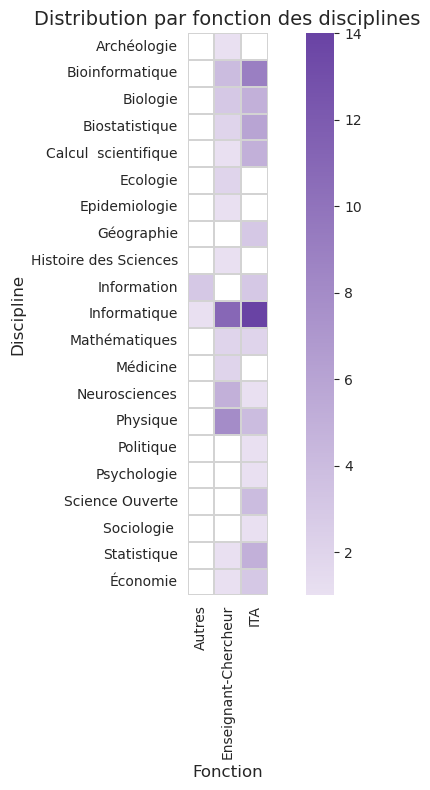

In [374]:
df=pd.DataFrame({'Count' :data_members.groupby(["Fonction", "Discipline"]).size()}).reset_index()

df.head()

df_heat = df.pivot(index="Discipline", columns="Fonction", values="Count")
df_heat = df_heat.sort_index(axis=0).sort_index(axis=1)

plt.figure(figsize=(8, 8)) 
plt.title('Distribution par fonction des disciplines', fontsize = 14) # title with fontsize 14
plt.xlabel('Fonction', fontsize = 12) # x-axis label with fontsize 12
plt.ylabel('Disciplines', fontsize = 12) # y-axis label with fontsize 12
#plt.yticks(rotation=15)
sns.heatmap(df_heat, cmap=RFRR_seq_palette, linewidths=0.05, linecolor="lightgrey", square=True).get_figure().savefig(('Results/Plots//heatmap_fonction_discipline_FR.png'))

df.to_csv('Results/members_fonction_discipline.csv', sep=';', encoding='latin3', index=False, header=True)


## Network composition analysis

### Disciplines


In [375]:
df_p=count_percent(data_members, "Discipline", "Results/", "counts_percent_")


         Discipline  Count  Percentage
10     Informatique     26   22.413793
1   Bioinformatique     13   11.206897
14         Physique     12   10.344828
2          Biologie      8    6.896552
3    Biostatistique      8    6.896552


#### Barplots du nombre de membres par discipline

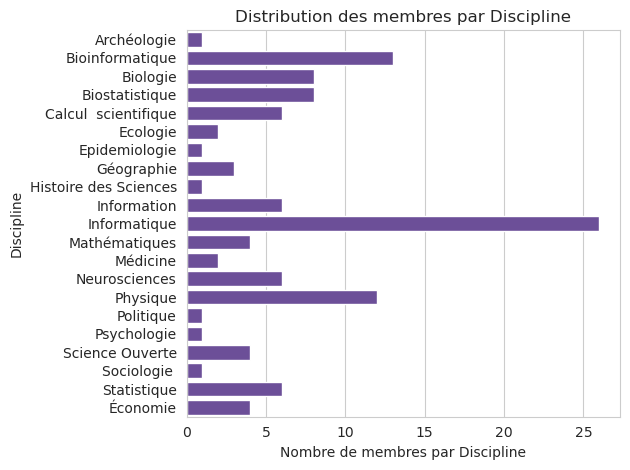

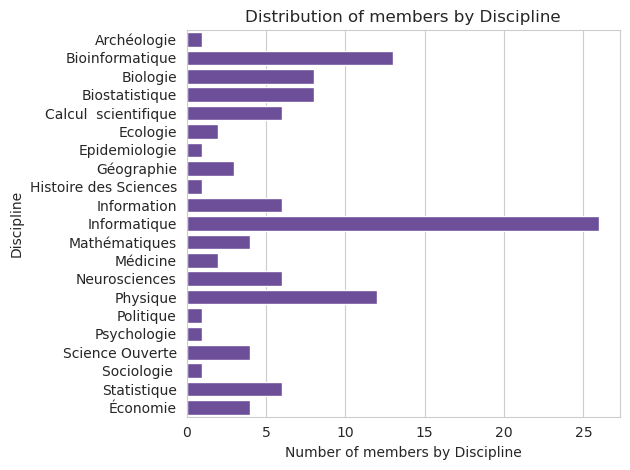

In [376]:
#Français
barp= bargraphs_FR (df_p,"Count", "Discipline", "dark_purple","Nombre",'Discipline', 'Results/Plots/',"counts_")
#Anglais
barpEN= bargraphs_EN(df_p,"Count", "Discipline", "dark_purple","Number",'Discipline', 'Results/Plots/',"counts_")

#### Barplots de pourcentages

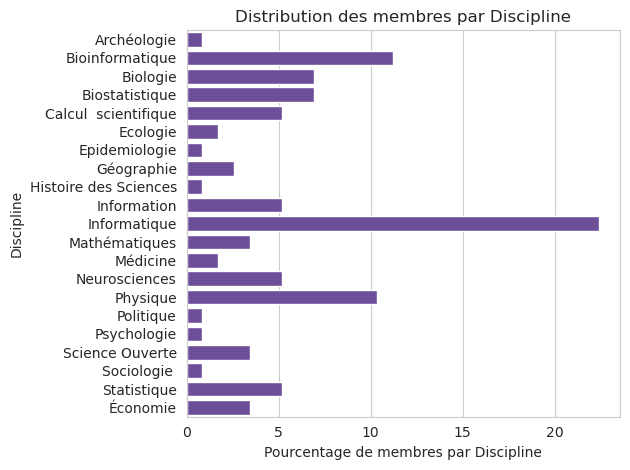

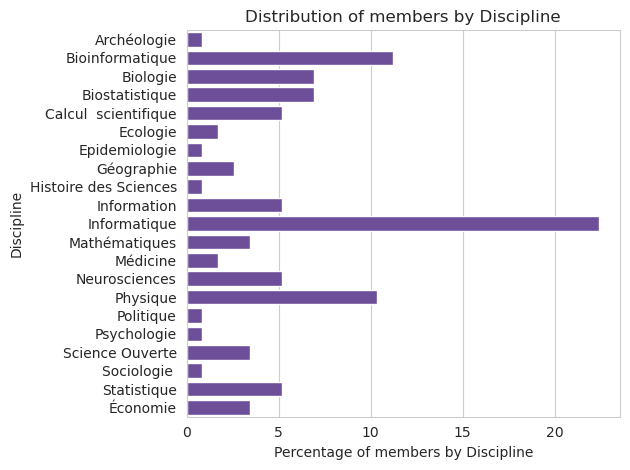

In [377]:
#Français
barp= bargraphs_FR (df_p,"Percentage", "Discipline", "dark_purple","Pourcentage", 'Discipline','Results/Plots/',"percentage_")
#Anglais
barpEN= bargraphs_EN(df_p,"Percentage", "Discipline", "dark_purple","Percentage",'Discipline', 'Results/Plots/',"percentage_")

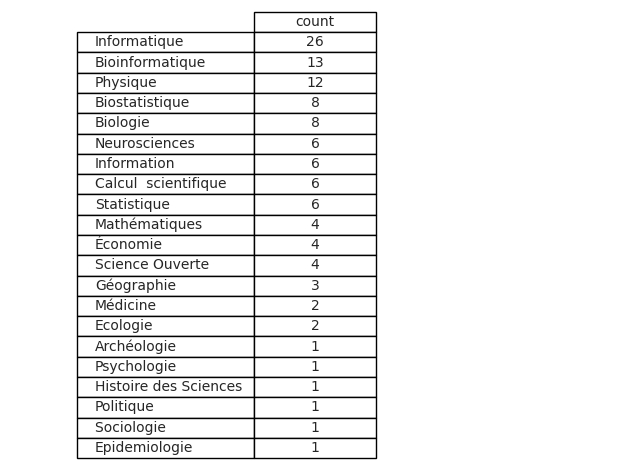

                 count
Discipline            
Informatique        26
Bioinformatique     13
Physique            12
Biostatistique       8
Biologie             8
(21, 1)
count    int64
dtype: object


count
Discipline            
Informatique        26
Bioinformatique     13
Physique            12
Biostatistique       8
Biologie             8

In [378]:
data_members.columns


df=pd.DataFrame(data_members['Discipline'].value_counts(normalize=False))
#df['Discipline']=df.index
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
table=pd.plotting.table(ax, df, loc='center',
                          cellLoc='center', colWidths=list([.2, .2]))

plt.savefig('Results/Tables/table_counts_discipline_FR.png')
plt.show()
print(df.head())
print(df.shape)

print(df.dtypes)
df.head()


### Membres par statut professionnel

In [379]:
df_p=count_percent(data_members, "Statut_abrev", "Results/", "counts_percent_")
# Save tables as images
#table_to_image (data, var, FoldPath, FileName) 

   Statut_abrev  Count  Percentage
11           IR     45   38.793103
4           CR      18   15.517241
10           IE     17   14.655172
12          MdC      9    7.758621
13           PU      9    7.758621


#### Barplots du nombre de membres par statut

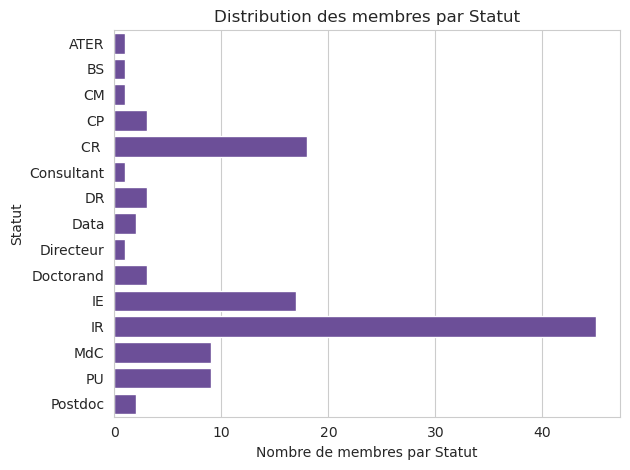

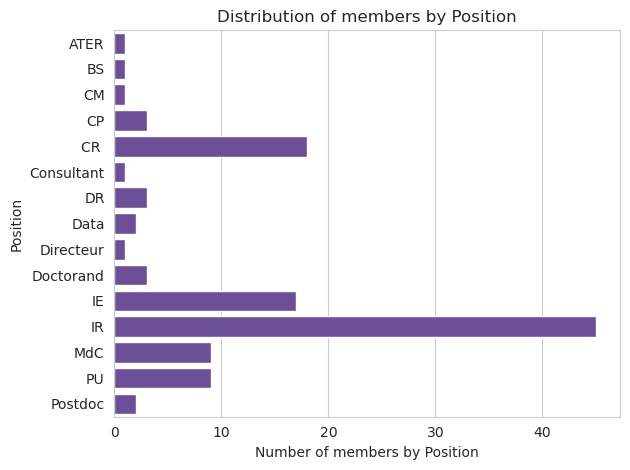

In [380]:
#Français
barp= bargraphs_FR (df_p,"Count", "Statut_abrev", "dark_purple","Nombre", 'Statut', 'Results/Plots/',"counts_")
#Anglais
barpEN= bargraphs_EN(df_p,"Count", "Statut_abrev", "dark_purple","Number",'Position', 'Results/Plots/',"counts_")

#### Barplots de pourcentages

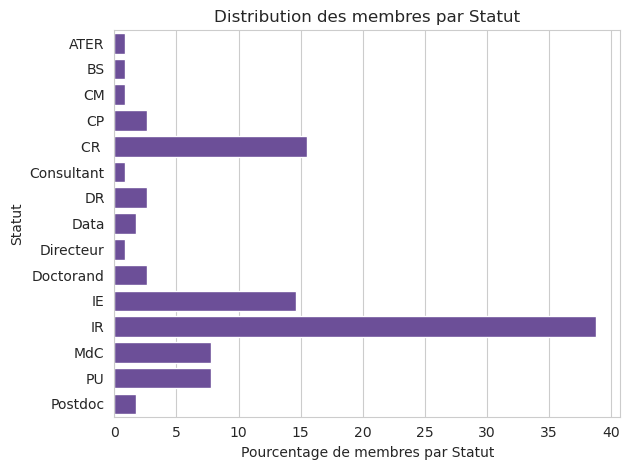

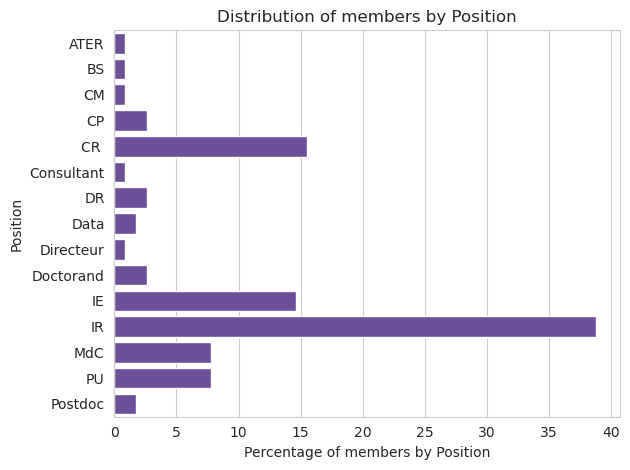

In [381]:
#Français
barp= bargraphs_FR (df_p,"Percentage", "Statut_abrev", "dark_purple","Pourcentage",'Statut','Results/Plots/',"percentage_")
#Anglais
barpEN= bargraphs_EN(df_p,"Percentage", "Statut_abrev", "dark_purple","Percentage",'Position', 'Results/Plots/',"percentage_")

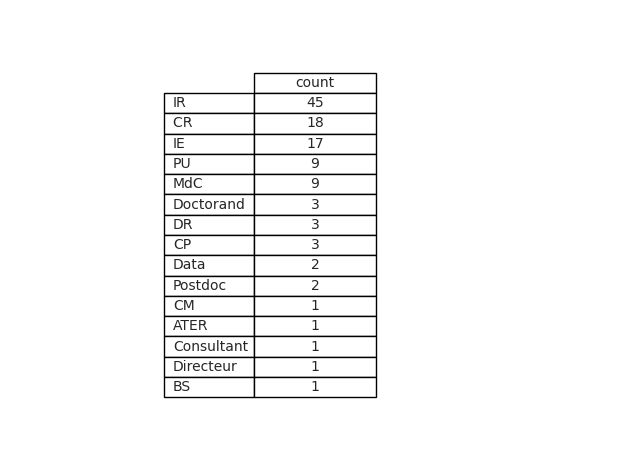

              count
Statut_abrev       
IR               45
CR               18
IE               17
PU                9
MdC               9
(15, 1)
count    int64
dtype: object


count
Statut_abrev       
IR               45
CR               18
IE               17
PU                9
MdC               9

In [382]:
data_members.columns

df=pd.DataFrame(data_members['Statut_abrev'].value_counts(normalize=False))
#rounded_df = df.round(decimals=2)

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
table=pd.plotting.table(ax, df, loc='center',
                          cellLoc='center', colWidths=list([.2, .2]))
plt.savefig('Results/Tables/table_counts_statut_FR.png')
plt.show()
print(df.head())
print(df.shape)

print(df.dtypes)
df.head()


### Membres par Fonction ITA ou Chercheur

In [383]:
df_p=count_percent(data_members, "Fonction", "Results/", "counts_percent_")
# Save tables as images
#table_to_image (data, var, FoldPath, FileName) 

               Fonction  Count  Percentage
2                   ITA     67   57.758621
1  Enseignant-Chercheur     45   38.793103
0                Autres      4    3.448276


#### Barplots du nombre de membres par fonction

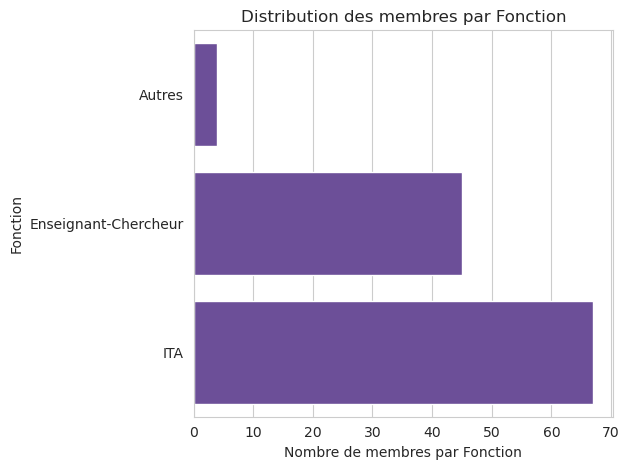

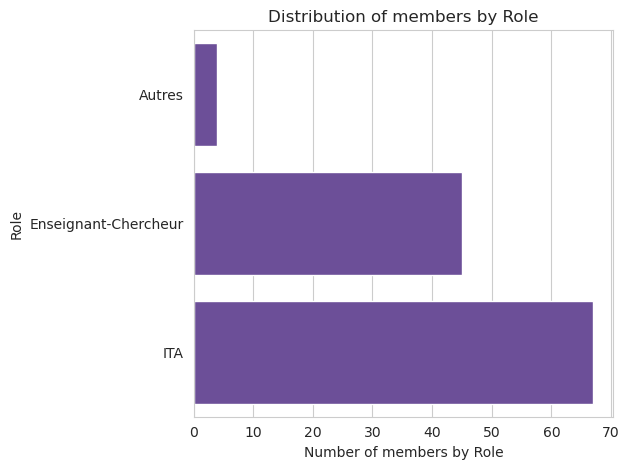

In [384]:
#Français
barp= bargraphs_FR (df_p,"Count", "Fonction", "dark_purple","Nombre", 'Fonction', 'Results/Plots/',"counts_")
#Anglais
barpEN= bargraphs_EN(df_p,"Count", "Fonction", "dark_purple","Number",'Role', 'Results/Plots/',"counts_")

#### Barplots de pourcentages

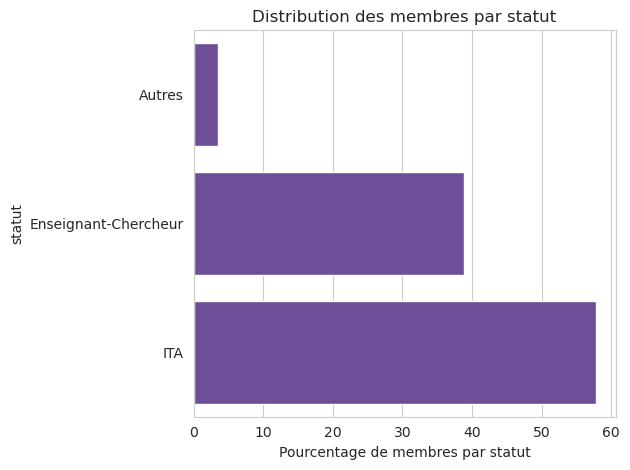

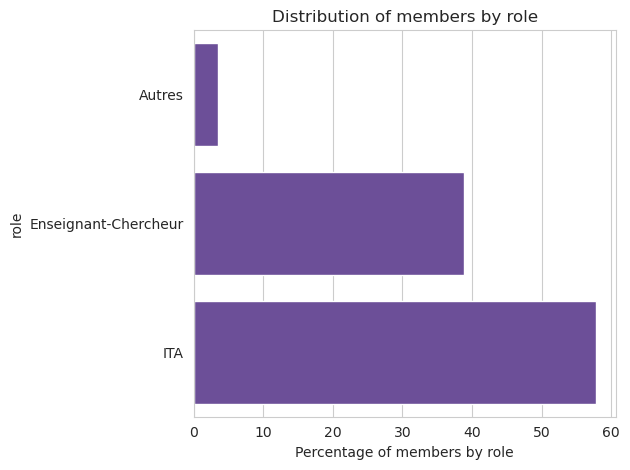

In [385]:
#Français
barp= bargraphs_FR (df_p,"Percentage", "Fonction", "dark_purple","Pourcentage",'statut','Results/Plots/',"percentage_")
#Anglais
barpEN= bargraphs_EN(df_p,"Percentage", "Fonction", "dark_purple","Percentage",'role', 'Results/Plots/',"percentage_")

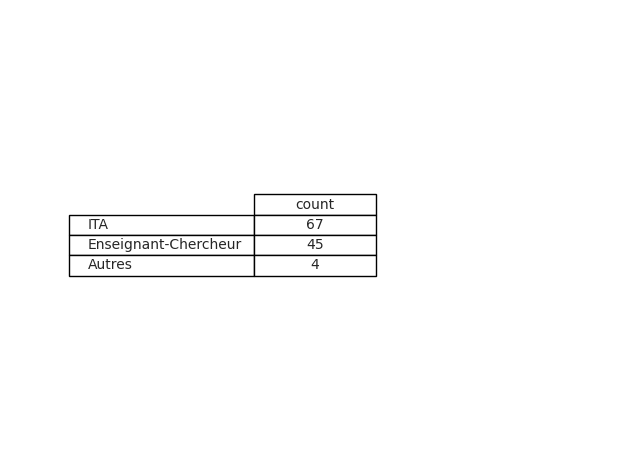

                      count
Fonction                   
ITA                      67
Enseignant-Chercheur     45
Autres                    4
(3, 1)
count    int64
dtype: object


count
Fonction                   
ITA                      67
Enseignant-Chercheur     45
Autres                    4

In [386]:
data_members.columns

df=pd.DataFrame(data_members['Fonction'].value_counts(normalize=False))
#rounded_df = df.round(decimals=2)

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
table=pd.plotting.table(ax, df, loc='center',
                          cellLoc='center', colWidths=list([.2, .2]))
plt.savefig('Results/Tables/table_counts_fonction_FR.png')
plt.show()
print(df.head())
print(df.shape)

print(df.dtypes)
df.head()


### Membres par genre

In [387]:
df_p=count_percent(data_members, "Genre", "Results/", "counts_percent_")
# Save tables as images
#table_to_image (data, var, FoldPath, FileName) 

  Genre  Count  Percentage
1     M     74   63.793103
0     F     42   36.206897


#### Barplots du nombre de membres par genre

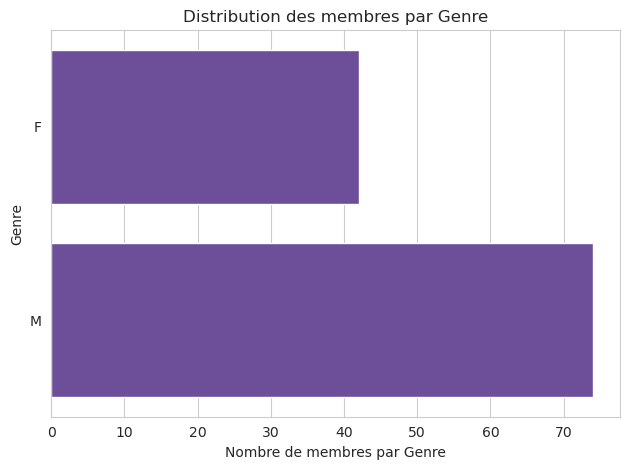

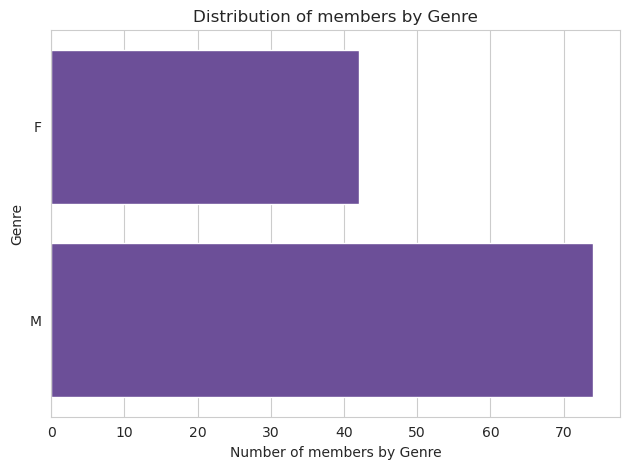

In [388]:
#Français
barp= bargraphs_FR (df_p,"Count", "Genre", "dark_purple","Nombre", 'Genre', 'Results/Plots/',"counts_")
#Anglais
barpEN= bargraphs_EN(df_p,"Count", "Genre", "dark_purple","Number",'Genre', 'Results/Plots/',"counts_")

#### Barplots de pourcentages

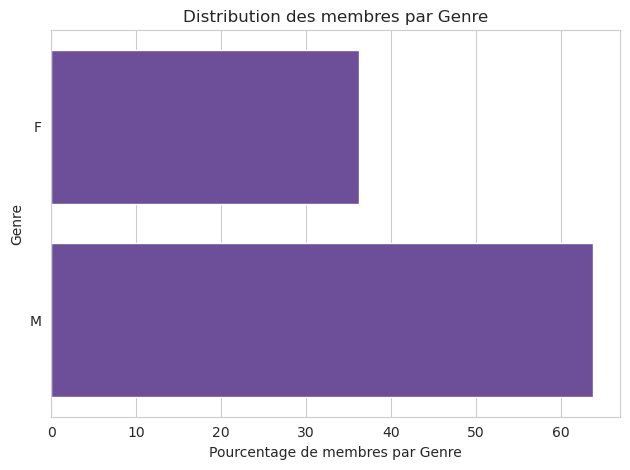

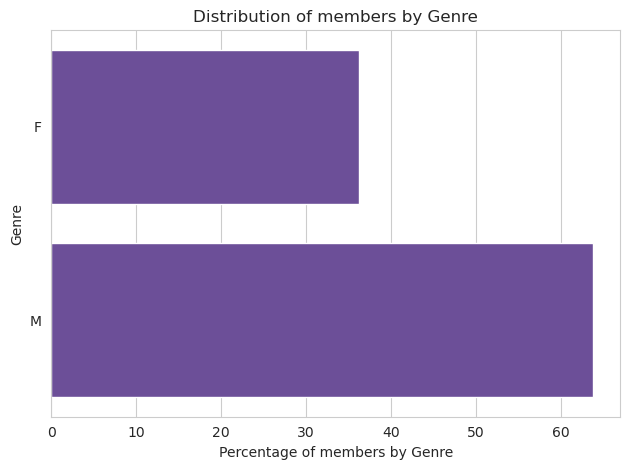

In [389]:
#Français
barp= bargraphs_FR (df_p,"Percentage", "Genre", "dark_purple","Pourcentage",'Genre','Results/Plots/',"percentage_")
#Anglais
barpEN= bargraphs_EN(df_p,"Percentage", "Genre", "dark_purple","Percentage",'Genre', 'Results/Plots/',"percentage_")

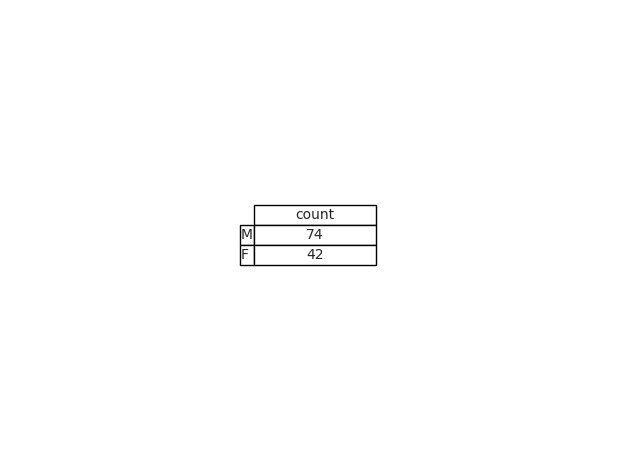

       count
Genre       
M         74
F         42
(2, 1)
count    int64
dtype: object


count
Genre       
M         74
F         42

In [390]:
data_members.columns

df=pd.DataFrame(data_members['Genre'].value_counts(normalize=False))
#rounded_df = df.round(decimals=2)

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
table=pd.plotting.table(ax, df, loc='center',
                          cellLoc='center', colWidths=list([.2, .2]))
plt.savefig('Results/Tables/table_counts_genre_FR.png')
plt.show()
print(df.head())
print(df.shape)

print(df.dtypes)
df.head()


### Distribution spatiale du réseaux: Presence sur des villes

In [391]:
df_p=count_percent(data_members, "Ville", "Results/", "counts_percent_")


       Ville  Count  Percentage
23     Paris     21   18.103448
14      Lyon     16   13.793103
9   Grenoble     10    8.620690
33  Toulouse      8    6.896552
29    Saclay      6    5.172414


#### Barplots du nombre de membres par ville

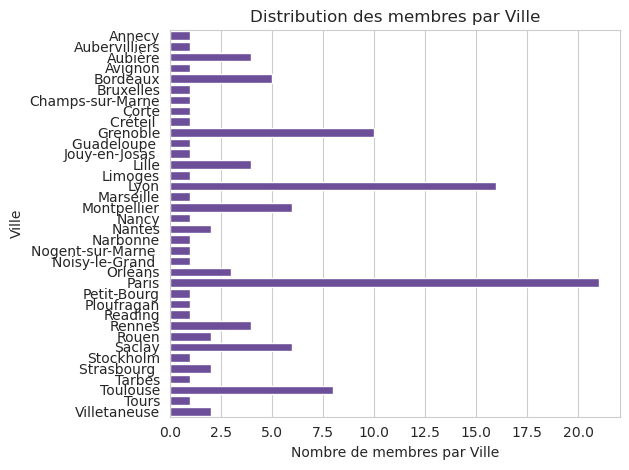

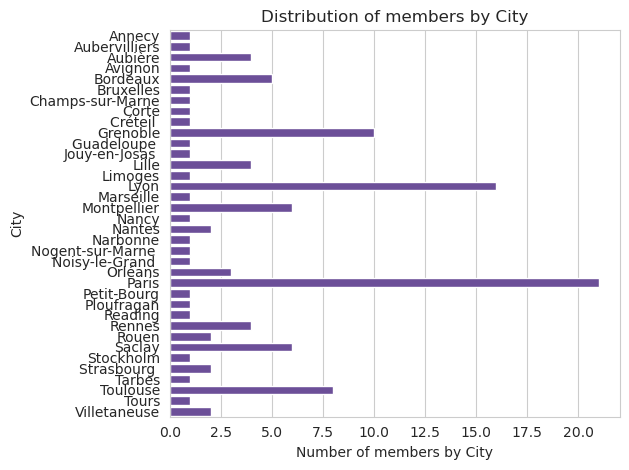

In [392]:
#Français
barp= bargraphs_FR (df_p,"Count", "Ville", "dark_purple","Nombre", 'Ville', 'Results/Plots/',"counts_")
#Anglais
barpEN= bargraphs_EN(df_p,"Count", "Ville", "dark_purple","Number",'City', 'Results/Plots/',"counts_")

#### Barplots de pourcentages

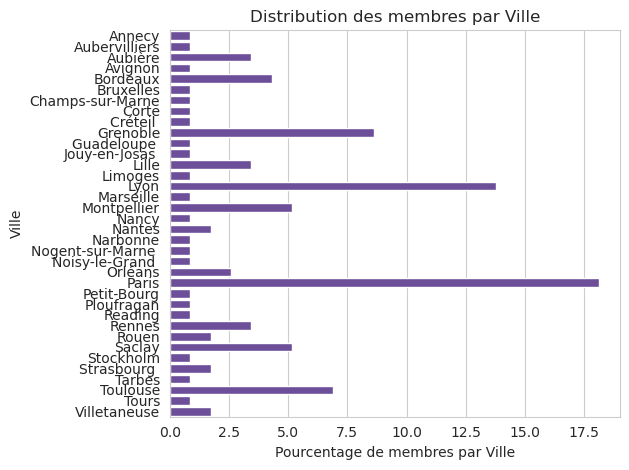

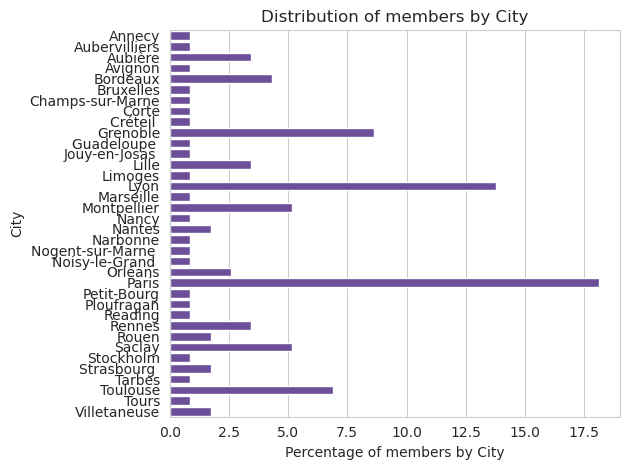

In [393]:
#Français
barp= bargraphs_FR (df_p,"Percentage", "Ville", "dark_purple","Pourcentage", 'Ville', 'Results/Plots/',"percentage_")
#Anglais
barpEN= bargraphs_EN(df_p,"Percentage", "Ville", "dark_purple","Percentage",'City', 'Results/Plots/',"percentage_")

### Distribution spatiale du réseaux: Presence sur les régions

In [394]:
df_p=count_percent(data_members, "Région", "Results/", "counts_percent_")


                  Région  Count  Percentage
15         Île-de-France     35   30.172414
0   Auvergne-Rhône-Alpes     31   26.724138
10             Occitanie     16   13.793103
9     Nouvelle-Aquitaine      6    5.172414
2               Bretagne      5    4.310345


#### Barplots du nombre de membres par ville

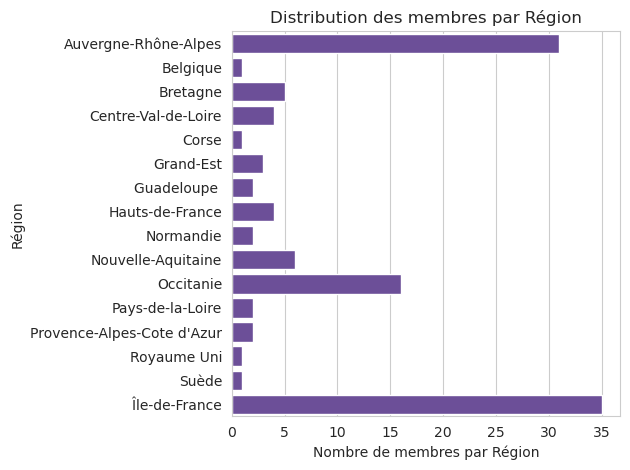

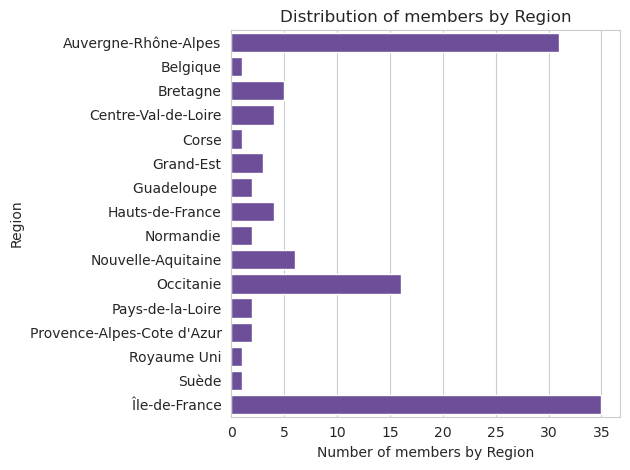

In [395]:
#Français
barp= bargraphs_FR (df_p,"Count", "Région", "dark_purple","Nombre", 'Région', 'Results/Plots/',"counts_")
#Anglais
barpEN= bargraphs_EN(df_p,"Count", "Région", "dark_purple","Number",'Region', 'Results/Plots/',"counts_")

#### Barplots de pourcentages

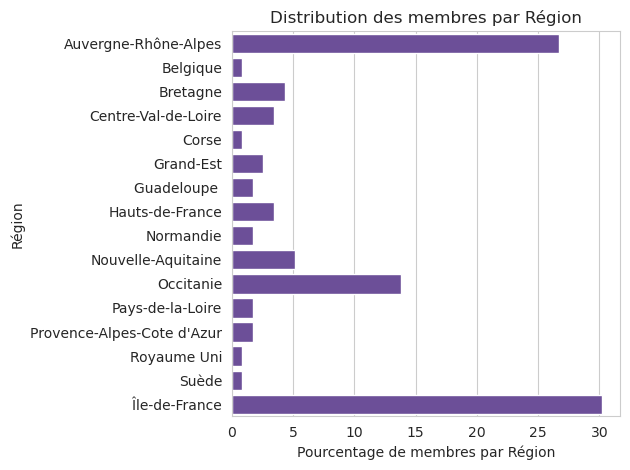

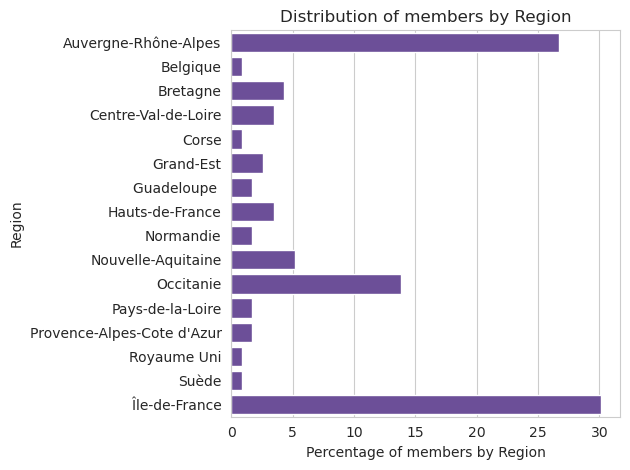

In [396]:
#Français
barp= bargraphs_FR (df_p,"Percentage", "Région", "dark_purple","Pourcentage", "Région", 'Results/Plots/',"percentage_")
#Anglais
barpEN= bargraphs_EN(df_p,"Percentage", "Région", "dark_purple","Percentage",'Region', 'Results/Plots/',"percentage_")

### Distribution par ville et region 

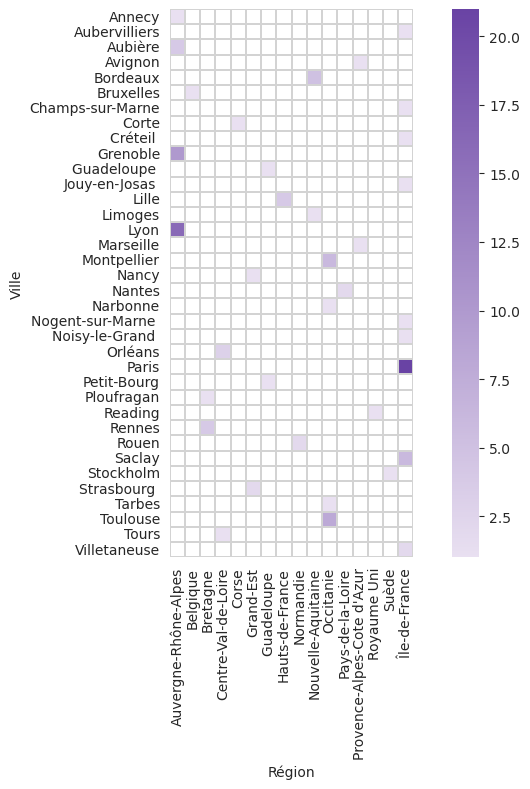

In [397]:
df=pd.DataFrame({'Count' :data_members.groupby(["Région", "Ville"]).size()}).reset_index()

df.head()

df_heat = df.pivot(index="Ville", columns="Région", values="Count")
df_heat = df_heat.sort_index(axis=0).sort_index(axis=1)

plt.figure(figsize=(8, 8))
ht = sns.heatmap(df_heat, cmap=RFRR_seq_palette, linewidths=0.05, linecolor="lightgrey", square=True).get_figure().savefig('Results/Plots//heatmap_region_ville_FR.png')
plt.show(ht)
#plt.yticks(rotation=15)
